# Coin toss experiment 

In [1]:
import numpy as np  

n, p = 1, 0.5
experiment = np.random.binomial(n, p, 30)

print("Data of the Experiment:", experiment)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 12


In [2]:
def coin_toss_experiment(n):
    head_counts = []
    for i in range(n):
        experiment = np.random.binomial(1, 0.5, 30)
        head_count = experiment[experiment==1].shape[0]
        head_counts.append(head_count)
    return np.array(head_counts)

In [3]:
head_count = coin_toss_experiment(100)

In [4]:
head_count[:10].T

array([16, 18, 13, 12,  9,  9, 11, 15, 15, 15])

In [5]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

/home/abhik/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhik/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhik/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/abhik/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


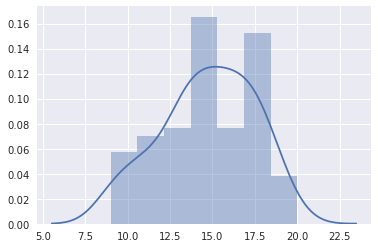

In [6]:
sns.distplot(head_count, kde=True);

In [7]:
def coin_toss_baised_experiment(n):
    head_counts = []
    for i in range(n):
        experiment = np.random.binomial(1, 0.8, 30)
        head_count = experiment[experiment==1].shape[0]
        head_counts.append(head_count)
    return np.array(head_counts)

In [8]:
head_count_biased = coin_toss_baised_experiment(100)

In [9]:
head_count_biased[:10].T

array([22, 24, 23, 25, 22, 26, 23, 26, 25, 27])

/home/abhik/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


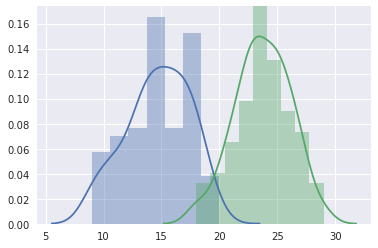

In [10]:
sns.distplot(head_count, kde=True)
sns.distplot(head_count_biased, kde=True)

# Mean Value Theorem

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

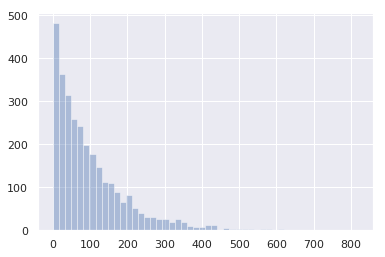

In [12]:
pop_data = np.random.gamma(1,100,3000)
sns.distplot(pop_data,kde=False);

In [13]:
means_size_100 = np.array([])
for i in range(10000):
    mean = np.random.choice(pop_data, 100).mean()
    means_size_100 = np.append(means_size_100, mean)

In [14]:
means_size_200 = np.array([])
for i in range(10000):
    mean = np.random.choice(pop_data, 200).mean()
    means_size_200 = np.append(means_size_200, mean)

In [15]:
means_size_400 = np.array([])
for i in range(10000):
    mean = np.random.choice(pop_data, 400).mean()
    means_size_400 = np.append(means_size_400, mean)

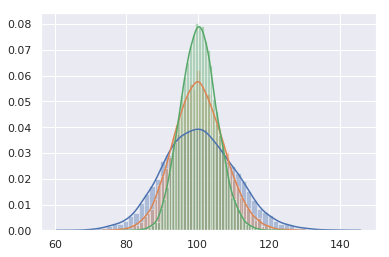

In [16]:
sns.distplot(means_size_100, kde=True);
sns.distplot(means_size_200, kde=True);
sns.distplot(means_size_400, kde=True);

In [17]:
pop_data.mean()

100.35978700795846

In [18]:
means_size_100.mean()

100.45928252074191

# Bootstrapping 

In [21]:
import numpy as np
np.random.seed(42)

die_vals = np.array([1,2,3,4,5,6])

In [22]:
np.random.choice(die_vals, size=20)

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4])

In [23]:
np.random.choice(die_vals, replace=False, size=6)

array([6, 3, 2, 4, 1, 5])

# Confidence Interval

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

tc_full = pd.read_csv('coffee_vs_tea.csv')
tc_red = tc_full.sample(200) #this is the only data you might actually get in the real world.

In [112]:
tc_red['drinks_coffee'].mean() # Drink Coffee

0.595

In [114]:
tc_red[tc_red['drinks_coffee'] == False]['height'].mean()

66.78492279927877

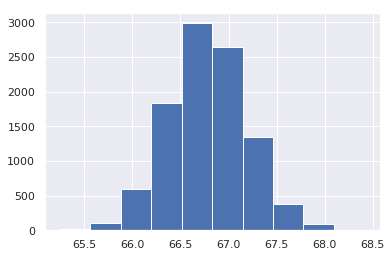

In [115]:
boot_means = []
for _ in range(10000):
    bootsamp = tc_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

In [116]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.9929132815752, 67.58402738281573)

In [118]:
tc_full[tc_full['drinks_coffee'] == False]['height'].mean() 

66.44340776214705

# A/B Testing with P Value 

/home/abhik/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


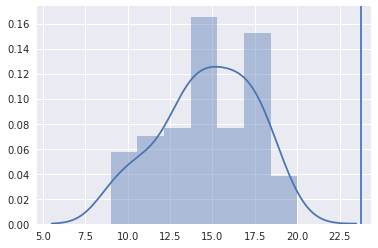

In [20]:
sns.distplot(head_count, kde=True)
plt.axvline(head_count_biased.mean());